In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users\91755\Downloads\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
print(df.describe())
print("--"*30)
print(df.info())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender  

In [6]:
df.shape

(200, 5)

In [7]:
df["Spending Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
75    5
     ..
63    1
34    1
44    1
45    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

### Visualizations

#### Univariate Analysis

Distribution plot

C:\Users\91755\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


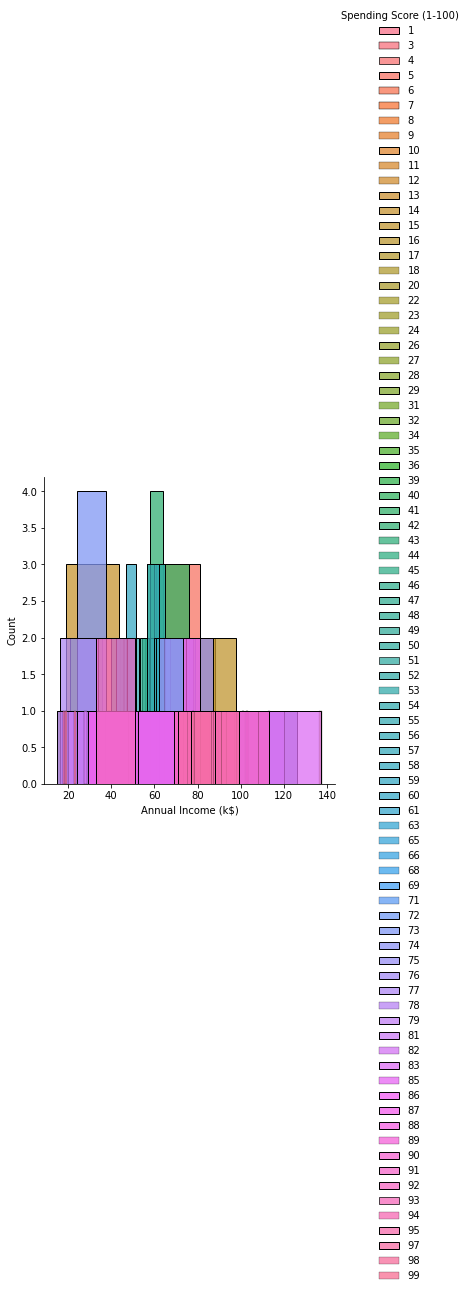

In [8]:
sns.FacetGrid(df,hue="Spending Score (1-100)",size=5).map(sns.histplot,"Annual Income (k$)").add_legend()

C:\Users\91755\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


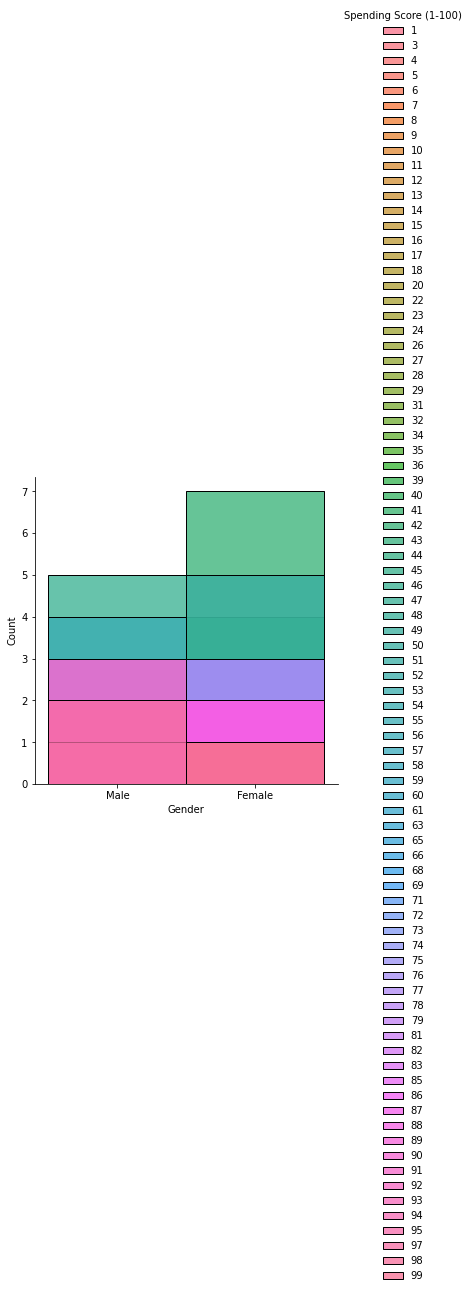

In [9]:
sns.FacetGrid(df,hue="Spending Score (1-100)",size=5).map(sns.histplot,"Gender").add_legend()

#### Bivariate analysis:

Box plot:

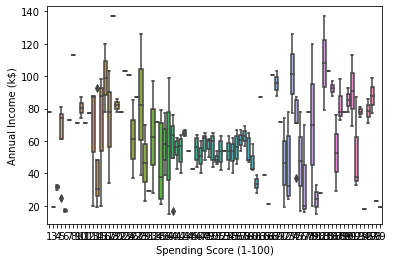

In [10]:
sns.boxplot(x="Spending Score (1-100)",y='Annual Income (k$)',data=df)
plt.show()

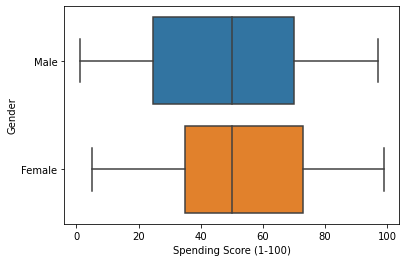

In [11]:
sns.boxplot(x="Spending Score (1-100)",y='Gender',data=df)
plt.show()

#### Multivariate Analysis:

Pair Plot:

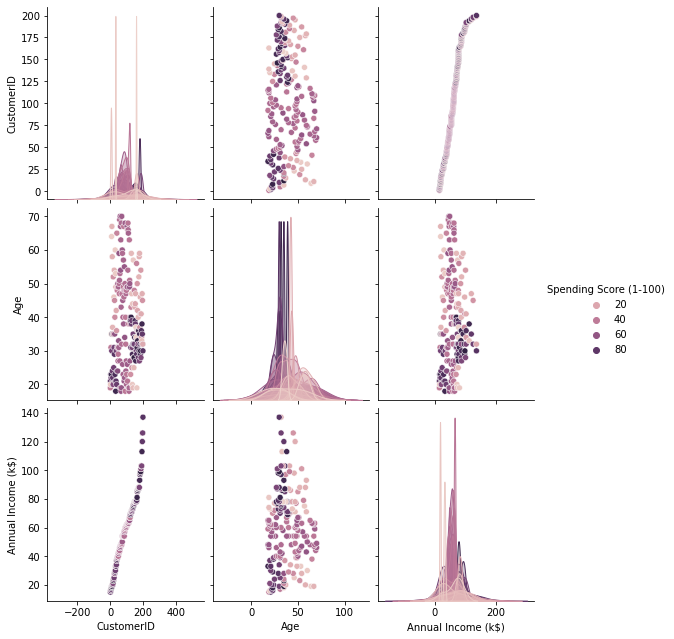

In [12]:
sns.pairplot(df,aspect=.85,hue="Spending Score (1-100)",height=3)
plt.show()

### Descriptive Statistics on  Dataset

In [13]:
mean = np.mean(df)

print("Mean = ", mean)


Mean =  CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64


In [14]:
from scipy import stats



# Mode
mode = stats.mode(df)
print("Mode = ", mode)


Mode =  ModeResult(mode=array([[1, 'Female', 32, 54, 42]], dtype=object), count=array([[  1, 112,  11,  12,   8]]))


In [15]:
import numpy as np
# Median
df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [16]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


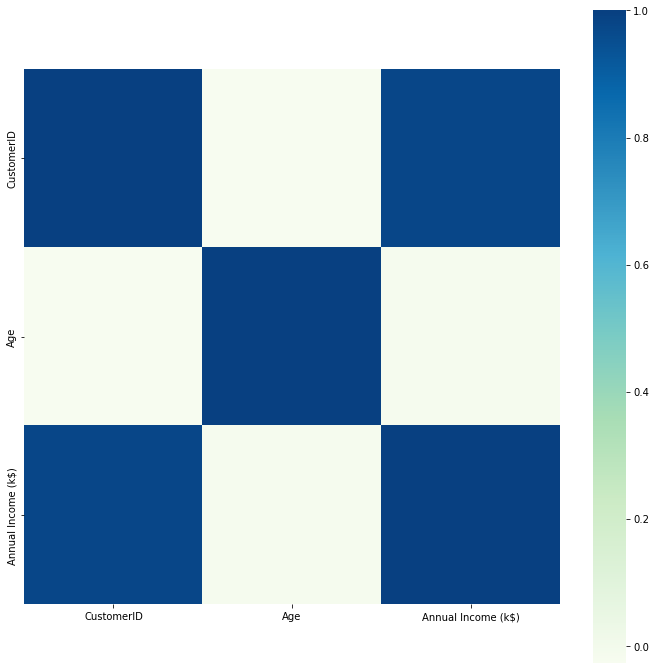

In [17]:
#correlations
plt.figure(figsize=(12,12))
sns.heatmap(df.drop('Spending Score (1-100)',axis=1).corr(),cmap='GnBu',square=True);

<AxesSubplot:>

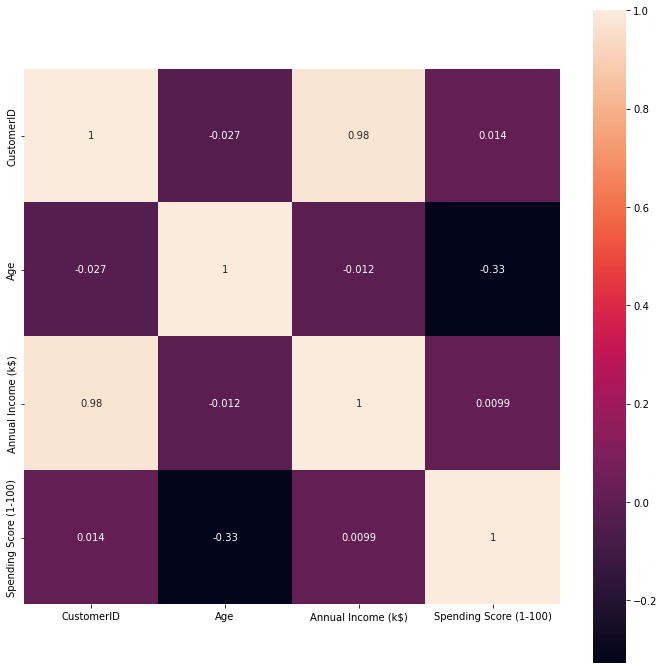

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,square=True)

In [19]:
#selecting the colums that are categorical
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Gender'], dtype='object')


### Check For categorical column and encoding them.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

### Handling the missing values

In [22]:
for i in df:
    mean_value = df[i].mean()
    df[i].fillna(value=mean_value, inplace = True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### Detection of Outliers

In [23]:
#looking for indexes that contain outlier in multiple columns
def detect_multiple_outlier(df,columns,index_list=[],threshold=1.5,cnt=1):
    """
    Returns outliers index based on Tukey's rule.
    """
    import collections
    for col in columns:
        desc=df[col].describe()
        
        q1=desc['25%']
        
        q3=desc['75%']
        IQR=q3-q1
        
        indexes=df[(df[col]<q1-threshold*IQR) |(df[col]>q3+threshold*IQR)].index
        index_list.extend(indexes)
 

        
    return([item for item, count in collections.Counter(index_list).items() if count > cnt])

In [24]:
#numeric columns
cols=list(df.columns)[1:]
outliers_=detect_multiple_outlier(df,cols,threshold=1.5,cnt=3)

In [25]:
len(outliers_),len(df)

(0, 200)

In [26]:
df.median()

CustomerID                100.5
Gender                      0.0
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

### Splitting data into dependent and independent variables.

In [27]:
# independent varibles-X

X=df.drop(columns=['Spending Score (1-100)'],axis=1)
X.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [28]:
# y target-dependent variable


y=df['Spending Score (1-100)']
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

### Building the model using K-Means Clustering Algorithm

In [29]:
x = df.iloc[:].values 

C:\Users\91755\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


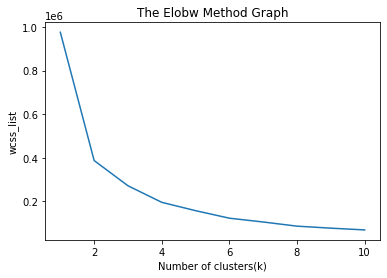

In [30]:
from sklearn.cluster import KMeans  
wcss_list= []     
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [31]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [32]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

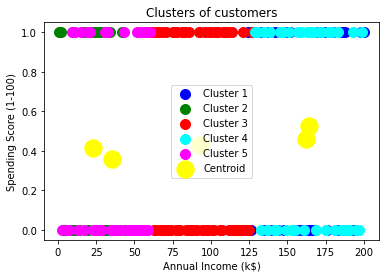

In [33]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

### Scaling the dependent and independent variables

In [34]:
from sklearn.preprocessing import scale
import pandas as pd

X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.738999
1,-1.706091,1.128152,-1.281035,-1.738999
2,-1.688771,-0.886405,-1.352802,-1.700830
3,-1.671450,-0.886405,-1.137502,-1.700830
4,-1.654129,-0.886405,-0.563369,-1.662660


### Splitting the data into the training and testing.

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y, test_size=0.3,random_state=0)

In [36]:
X_train


,CustomerID,Gender,Age,Annual Income (k$)
131,0.545603,1.128152,0.010765,0.398489
96,-0.060623,-0.886405,0.584899,-0.021375
181,1.411639,-0.886405,-0.491602,1.390894
19,-1.394318,-0.886405,-0.276302,-1.433644
153,0.926659,-0.886405,-0.061002,0.665675
...,...,...,...,...
67,-0.562924,-0.886405,2.091999,-0.479408
192,1.602167,1.128152,-0.419835,2.001605
117,0.303113,-0.886405,0.728432,0.169472
47,-0.909338,-0.886405,-0.850435,-0.784763


In [37]:
y_train

131    75
96     47
181    86
19     98
153    76
       ..
67     48
192     8
117    59
47     47
172    10
Name: Spending Score (1-100), Length: 140, dtype: int64

In [38]:
X_train.shape,y_train.shape

((140, 4), (140,))

In [39]:
X_test

,CustomerID,Gender,Age,Annual Income (k$)
18,-1.411639,1.128152,0.943732,-1.433644
170,1.221111,1.128152,0.082532,1.009200
107,0.129905,1.128152,1.087265,0.093133
98,-0.025981,1.128152,0.656665,0.016795
177,1.342356,1.128152,-0.850435,1.047369
182,1.428960,1.128152,0.513132,1.429063
5,-1.636808,-0.886405,-1.209269,-1.662660
146,0.805414,1.128152,0.656665,0.627505
12,-1.515563,-0.886405,1.374332,-1.548152
152,0.909338,-0.886405,0.369598,0.665675


In [40]:
y_test

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
134     5
66     50
26     32
113    46
168    27
63     59
8       3
75     54
118    43
143    87
71     42
124    29
184    39
97     50
149    90
24     14
30      4
160    35
40     35
56     50
Name: Spending Score (1-100), dtype: int64

In [41]:
X_test.shape , y_test.shape

((60, 4), (60,))

### Build the Model

In [42]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Train the Model

In [43]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.12770454138243592


### Test the Model

In [44]:
y_pred = regr.predict(X_test)
print(y_pred)

[44.59494766 46.98621001 41.64754724 44.40063425 52.95026868 43.46046031
 62.41724872 43.8155682  45.85819045 49.49154304 58.31808382 55.65532881
 51.4521041  48.16080706 40.60894732 61.90630045 59.45264957 44.52783141
 57.79726313 39.58625685 55.06273631 52.91508352 60.22045657 56.00351357
 35.0487094  48.22968172 48.87997338 50.71829137 51.58879674 48.80447839
 56.3258023  45.71803313 46.07698265 61.51146602 51.05374662 51.52226805
 48.61244832 58.29566823 49.51278778 39.99176385 56.72703067 51.11836891
 51.30753762 57.62292094 52.60634251 46.14003712 39.30737949 54.64943388
 46.68399517 54.98002919 49.29516644 59.28404586 49.51840783 57.8815581
 50.16159955 47.16747533 40.52544628 44.07658712 41.52816554 47.65440016]


In [45]:
print(y_test)

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
134     5
66     50
26     32
113    46
168    27
63     59
8       3
75     54
118    43
143    87
71     42
124    29
184    39
97     50
149    90
24     14
30      4
160    35
40     35
56     50
Name: Spending Score (1-100), dtype: int64


In [46]:
df = pd.DataFrame(list(zip(y_test, y_pred)),
               columns =['Actual value', 'Predicted Value'])

In [47]:
df

,Actual value,Predicted Value
0,29,44.594948
1,13,46.986210
2,46,41.647547
3,42,44.400634
4,69,52.950269
5,15,43.460460
6,76,62.417249
7,36,43.815568
8,15,45.858190
9,20,49.491543


### Measure the Performance Metrics

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 20.83
Mean squared error: 625.64
Root mean squared error: 25.01
